In [2]:
import sys, os
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures

project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))
sys.path.append(project_root)

from functions import *

%load_ext autoreload
%autoreload 2

In [3]:
(X_train, y_train),(X_test, y_test),_ = make_data(1000)
X_train, X_test = X_train.reshape(-1,1), X_test.reshape(-1,1)
y_train, y_test = y_train.reshape(-1,1), y_test.reshape(-1,1)

KeyboardInterrupt: 

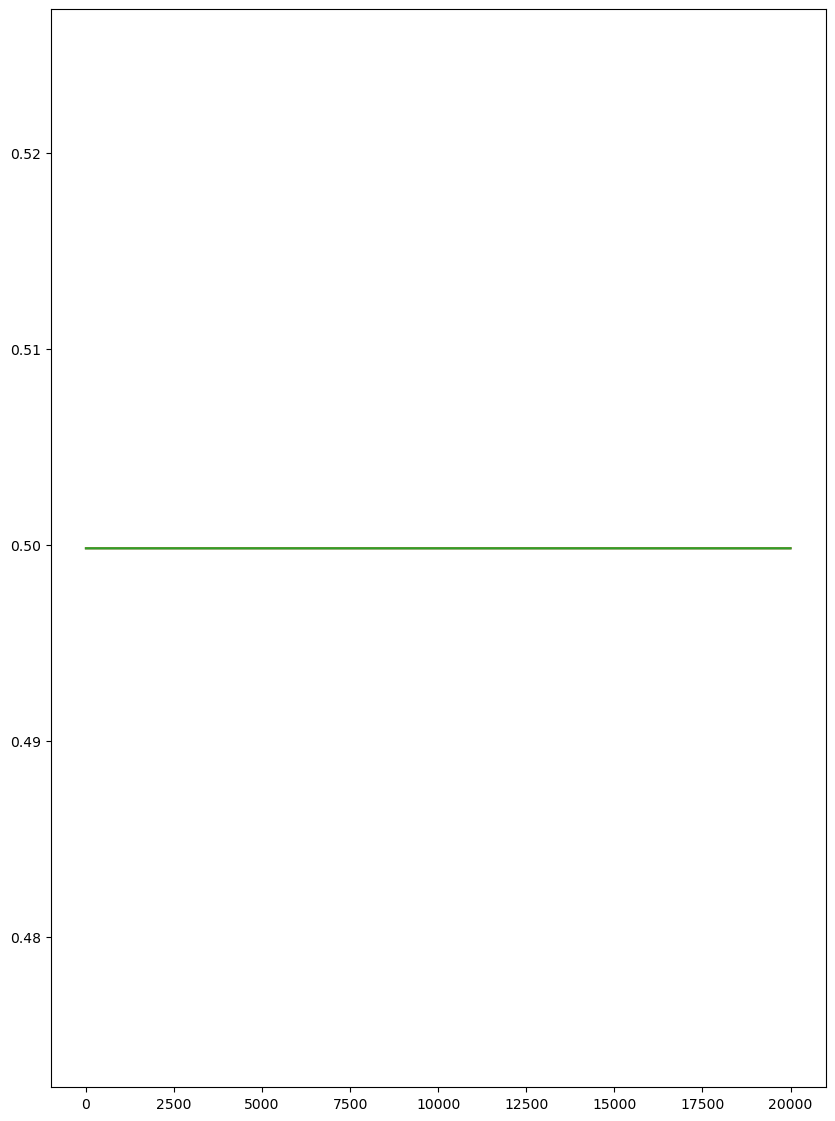

In [4]:
learning_rate = [0.001, 0.01, 0.1, 0.2, 0.3]
node_analysis = [5, 10, 20, 40, 80]
mses = np.zeros((len(learning_rate), len(node_analysis)))
fig, ax = plt.subplots(figsize=(10,14))
for i,h in enumerate(learning_rate):
    for j,k in enumerate(node_analysis):
        reg_nn_gd = NeuralNetwork(1, [k, 1], [sigmoid, identity], [derivate(sigmoid), derivate(identity)], mse, mse_der)
        reg_nn_gd.train(X_train, y_train, epochs=20000, learning_rate=h)
        y_pred_nn_gd = reg_nn_gd._feed_forward(X_test)
        mse_val = reg_nn_gd.cost(y_test, y_pred_nn_gd)
        mses[i, j] = mse_val
        if k == 5 or k == 80:
            ax.plot(reg_nn_gd.get_info()['Cost_history'], label=f"LR: {h}, Layers: {k}")
plt.legend()
plt.show()

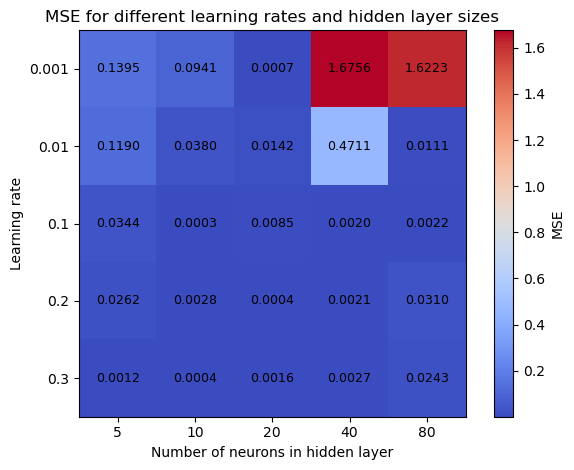

In [ ]:
plt.imshow(mses, cmap='coolwarm', interpolation='nearest')
plt.xticks(ticks=np.arange(len(node_analysis)), labels=node_analysis)
plt.yticks(ticks=np.arange(len(learning_rate)), labels=learning_rate)
plt.xlabel("Number of neurons in hidden layer")
plt.ylabel("Learning rate")
plt.colorbar(label="MSE")
plt.title("MSE for different learning rates and hidden layer sizes")

# === Add text labels (the key part) ===
for i in range(len(learning_rate)):
    for j in range(len(node_analysis)):
        plt.text(
            j, i, f"{mses[i, j]:.4f}",  # format to 3 decimals
            ha='center', va='center', color='black', fontsize=9
        )

plt.tight_layout()
plt.show()

In [5]:
poly = PolynomialFeatures(degree=8)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

theta = np.linalg.pinv(X_train_poly.T @ X_train_poly) @ X_train_poly.T @ y_train
y_pred_OLS = X_test_poly @ theta

In [14]:
reg_nn_gd_1layer = NeuralNetwork(1, [50, 1], [sigmoid, identity], [derivate(sigmoid), derivate(identity)], mse, mse_der)
reg_nn_gd_2layer = NeuralNetwork(1, [50, 100, 1], [sigmoid, sigmoid, identity], [derivate(sigmoid), derivate(sigmoid), derivate(identity)], mse, mse_der)

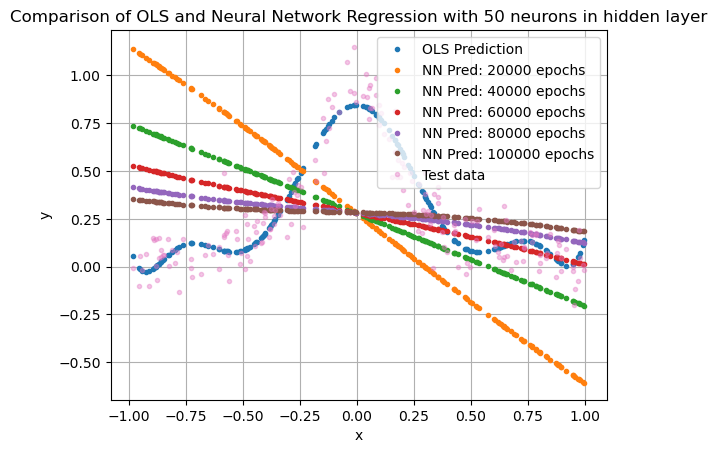

In [15]:
epochs = 20000

plt.plot(X_test,y_pred_OLS, ".",  label="OLS Prediction")
# plt.plot(X_test,y_pred_nn_adam, ".", label="NN Adam Prediction")
# plt.plot(X_test, y_pred_nn_RMSProp, ".", label="NN RMSProp Prediction")
for i in range(5):
    reg_nn_gd_1layer.train(X_train, y_train, epochs=epochs, learning_rate=0.01)
    y_pred_nn_gd = reg_nn_gd_1layer._feed_forward(X_test)
    plt.plot(X_test, y_pred_nn_gd, ".", label=f"NN Pred: {(i+1)*epochs} epochs")
plt.plot(X_test, y_test, ".", label="Test data", alpha = 0.4)
plt.title("Comparison of OLS and Neural Network Regression with 50 neurons in hidden layer")
plt.xlabel("x")
plt.ylabel("y")
plt.grid()
plt.legend()

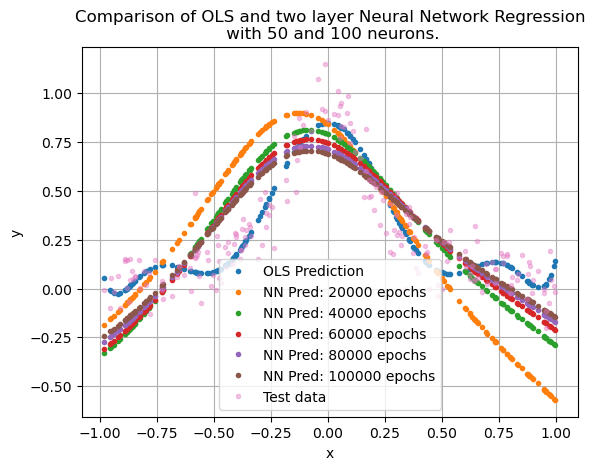

In [16]:
epochs = 20000

plt.plot(X_test,y_pred_OLS, ".",  label="OLS Prediction")
plt.title("Comparison of OLS and two layer Neural Network Regression\n with 50 and 100 neurons.")
# plt.plot(X_test,y_pred_nn_adam, ".", label="NN Adam Prediction")
# plt.plot(X_test, y_pred_nn_RMSProp, ".", label="NN RMSProp Prediction")
for i in range(5):
    reg_nn_gd_2layer.train(X_train, y_train, epochs=epochs, learning_rate=0.01)
    y_pred_nn_gd = reg_nn_gd_2layer._feed_forward(X_test)
    plt.plot(X_test, y_pred_nn_gd, ".", label=f"NN Pred: {(i+1)*epochs} epochs")
plt.plot(X_test, y_test, ".", label="Test data", alpha = 0.4)

plt.xlabel("x")
plt.ylabel("y")
plt.grid()
plt.legend()

In [18]:
# Cost histories.
# plt.plot(reg_nn_gd_1layer.get_info()['Cost_history'], label="1 layer NN")
# plt.plot(reg_nn_gd_2layer.get_info()['Cost_history'], label="2 layer NN")  
# plt.xlabel("Epochs")
# plt.ylabel("MSE Cost")
# plt.yscale("log")
# plt.title("Cost history for 1 and 2 layer Neural Networks with 50 and 100 neurons")
# plt.legend()
reg_nn_gd_1layer.get_info()['Cost_history']


[np.float64(0.49981919837959393),
 np.float64(0.49981919837959393),
 np.float64(0.49981919837959393),
 np.float64(0.49981919837959393),
 np.float64(0.49981919837959393),
 np.float64(0.49981919837959393),
 np.float64(0.49981919837959393),
 np.float64(0.49981919837959393),
 np.float64(0.49981919837959393),
 np.float64(0.49981919837959393),
 np.float64(0.49981919837959393),
 np.float64(0.49981919837959393),
 np.float64(0.49981919837959393),
 np.float64(0.49981919837959393),
 np.float64(0.49981919837959393),
 np.float64(0.49981919837959393),
 np.float64(0.49981919837959393),
 np.float64(0.49981919837959393),
 np.float64(0.49981919837959393),
 np.float64(0.49981919837959393),
 np.float64(0.49981919837959393),
 np.float64(0.49981919837959393),
 np.float64(0.49981919837959393),
 np.float64(0.49981919837959393),
 np.float64(0.49981919837959393),
 np.float64(0.49981919837959393),
 np.float64(0.49981919837959393),
 np.float64(0.49981919837959393),
 np.float64(0.49981919837959393),
 np.float64(0.

In [ ]:
lrs = [0.1, 0.2, 0.3]
mses = []
fig, ax = plt.subplots(len(lrs), 2, figsize=(10, 15))
fig.suptitle("Change in NN Prediction with different Learning Rates\n and cost history of training")
for i in lrs:
    ax[lrs.index(i), 0].plot(X_test,y_pred_OLS, ".",  label="OLS Prediction")
    reg_2layer_lr = NeuralNetwork(1, [50, 100, 1], [sigmoid, sigmoid, identity], [derivate(sigmoid), derivate(sigmoid), derivate(identity)], mse, mse_der)
    reg_2layer_lr.train(X_train, y_train, epochs=10000, learning_rate=i)
    y_pred_nn_gd = reg_2layer_lr._feed_forward(X_test)
    mses.append(reg_2layer_lr.cost(y_test, y_pred_nn_gd))
    ax[lrs.index(i), 0].plot(X_test, y_pred_nn_gd, ".", label=f"NN Pred LR: {i}")
    ax[lrs.index(i), 0].plot(X_test, y_test, ".", label="Test data", alpha = 0.4)
    ax[lrs.index(i), 0].set_title(f"NN Prediction with LR: {i}")
    ax[lrs.index(i), 0].set_xlabel("x")
    ax[lrs.index(i), 0].set_ylabel("y")
    ax[lrs.index(i), 0].grid()
    ax[lrs.index(i), 0].legend()
   
    ax[lrs.index(i), 1].plot(reg_2layer_lr.get_info()['Cost_history'], label=f"LR: {i}")
    ax[lrs.index(i), 1].set_title(f"Cost History with LR: {i}")
    ax[lrs.index(i), 1].set_xlabel("Epochs")
    ax[lrs.index(i), 1].set_ylabel("Cost")
    ax[lrs.index(i), 1].grid()
    ax[lrs.index(i), 1].legend()

plt.tight_layout()
plt.show()
   

y_pred_nn_gd_1layer = reg_nn_gd_1layer._feed_forward(X_test)
y_pred_nn_gd_2layer = reg_nn_gd_2layer._feed_forward(X_test)
print(mse(y_test, y_pred_nn_gd_1layer), mse(y_test, y_pred_nn_gd_2layer), mse(y_test, y_pred_OLS))

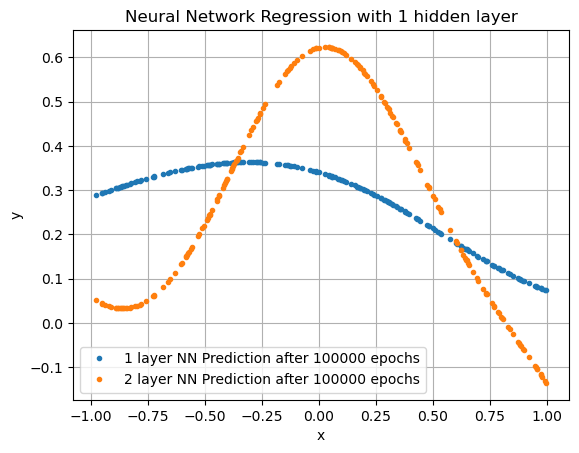

In [129]:
reg_nn_gd_1layer.train(X_train, y_train, epochs=60000, learning_rate=0.01)
reg_nn_gd_2layer.train(X_train, y_train, epochs=60000, learning_rate=0.01)
plt.plot(X_test, reg_nn_gd_1layer._feed_forward(X_test), ".", label="1 layer NN Prediction after 100000 epochs")
plt.plot(X_test, reg_nn_gd_2layer._feed_forward(X_test), ".", label="2 layer NN Prediction after 100000 epochs")
plt.legend()
plt.grid()
plt.xlabel("x")
plt.ylabel("y")
plt.title("Neural Network Regression with 1 hidden layer")
plt.show()

Text(0, 0.5, 'y')

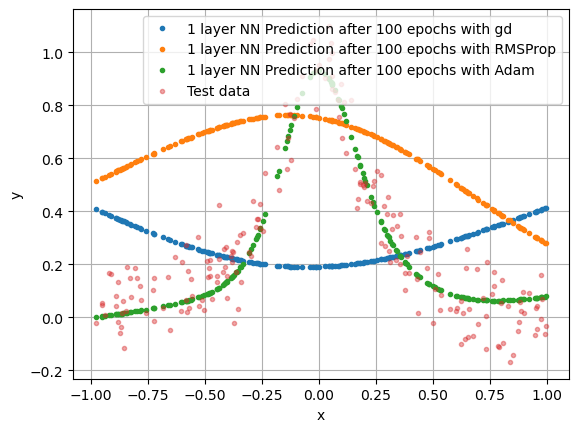

In [134]:
l = ["gd", "RMSProp", "Adam"]
for i in l:
    reg_ffnn = NeuralNetwork(1, [50, 1], [sigmoid, identity], [derivate(sigmoid), derivate(identity)], mse, mse_der)
    reg_ffnn.train_SGD(X_train, y_train, epochs=100, learning_rate=0.01, batch_size=16, optimizer=i)
    plt.plot(X_test, reg_ffnn._feed_forward(X_test), ".", label=f"1 layer NN Prediction after 100 epochs with {i}")
plt.plot(X_test, y_test, ".", label="Test data", alpha = 0.4)
plt.legend()
plt.grid()
plt.xlabel("x")
plt.ylabel("y") 